# Recommender Systems with Python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('IMDB-Dataset/movies.csv')
datar=pd.read_csv('IMDB-Dataset/ratings.csv')

In [3]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
datar.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
#merging the both dataframes
df= pd.merge(data,datar,on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [6]:
df.describe()

,movieId,userId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,13381.312477,364.924539,3.516850,1.130424e+09
std,26170.456869,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


In [7]:
data.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [8]:
datar.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


# EDA
lets explore the data a bit and get a look at some of the best rated movies

## Visualization Imports

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


In [11]:
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [12]:
df.groupby('title')['rating'].mean().sort_values(ascending=True).head()

title
It's Pat (1994)                                      0.5
Blood of a Poet, The (Sang d'un poète, Le) (1930)    0.5
Angels in America (2003)                             0.5
The Aztec Mummy Against the Humanoid Robot (1958)    0.5
Day Night Day Night (2006)                           0.5
Name: rating, dtype: float64

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Being Human (1993)                   5.0
Three Ages (1923)                    5.0
The Liberator (2013)                 5.0
October Baby (2011)                  5.0
Resident Evil: Retribution (2012)    5.0
Name: rating, dtype: float64

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [16]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


In [19]:
ratings['num of ratings']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


<AxesSubplot:>

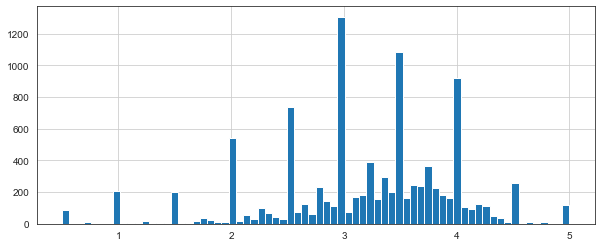

In [18]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

<AxesSubplot:>

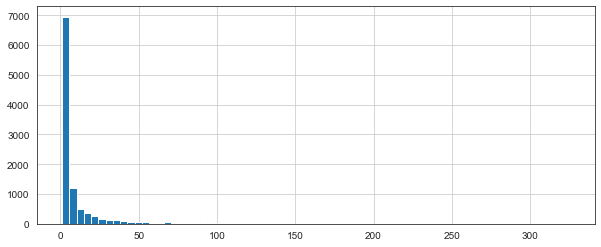

In [20]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

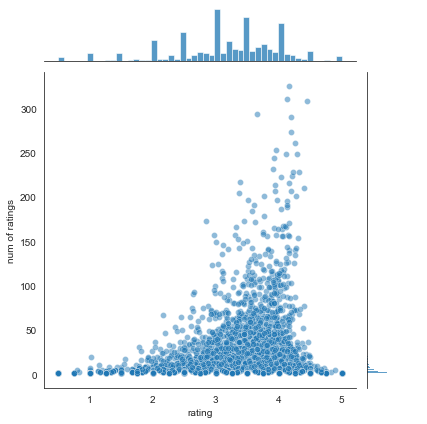

In [22]:
sns.jointplot(x='rating',y='num of ratings', data=ratings,alpha=0.5)

In [24]:
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [26]:
moviemat= df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290


In [28]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


In [29]:
pulpfiction_user_ratings= moviemat['Pulp Fiction (1994)']
pulpfiction_user_ratings.head()

userId
1    4.0
2    NaN
3    5.0
4    4.0
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [30]:
pulpfiction_user_ratings

userId
1      4.0
2      NaN
3      5.0
4      4.0
5      NaN
      ... 
664    NaN
665    4.0
666    5.0
667    4.5
668    4.0
Name: Pulp Fiction (1994), Length: 668, dtype: float64

In [31]:
forrestgump_user_ratings=moviemat['Forrest Gump (1994)']

In [34]:
similar_to_pulpfiction=moviemat.corrwith(pulpfiction_user_ratings)
similar_to_forrestgump=moviemat.corrwith(forrestgump_user_ratings)

In [35]:
corr_pulpfiction = pd.DataFrame(similar_to_pulpfiction,columns=['Correlation'])
corr_pulpfiction.dropna(inplace=True)
corr_pulpfiction.head()

,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",-0.475997
(500) Days of Summer (2009),0.076894
*batteries not included (1987),0.881917
...And Justice for All (1979),0.961524


In [36]:
corr_pulpfiction.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Delta Farce (2007),1.0
Waxwork (1988),1.0
"Endless Summer 2, The (1994)",1.0
Torch Song Trilogy (1988),1.0
"Art of the Steal, The (2009)",1.0
Rush (1991),1.0
Millennium (1989),1.0
Minions (2015),1.0
"Mirror, The (Zerkalo) (1975)",1.0


In [37]:
corr_pulpfiction = corr_pulpfiction.join(ratings['num of ratings'])

In [38]:
corr_pulpfiction.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",-0.475997,20
(500) Days of Summer (2009),0.076894,37
*batteries not included (1987),0.881917,11
...And Justice for All (1979),0.961524,10


In [40]:
corr_pulpfiction[corr_pulpfiction['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,325
Being John Malkovich (1999),0.542833,124
Reservoir Dogs (1992),0.472520,131
Kill Bill: Vol. 1 (2003),0.442408,110
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),0.406999,125


In [41]:
corr_pulpfiction[corr_pulpfiction['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,325
Being John Malkovich (1999),0.542833,124
Reservoir Dogs (1992),0.472520,131
Kill Bill: Vol. 1 (2003),0.442408,110
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),0.406999,125
...,...,...
Sleepless in Seattle (1993),-0.172582,127
Broken Arrow (1996),-0.184054,109
Mrs. Doubtfire (1993),-0.188385,166


In [43]:
corr_forrestgump = pd.DataFrame(similar_to_forrestgump,columns=['Correlation'])
corr_forrestgump.dropna(inplace=True)
corr_forrestgump = corr_forrestgump.join(ratings['num of ratings'])
corr_forrestgump[corr_forrestgump['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,311
"Shawshank Redemption, The (1994)",0.471145,308
Ghost (1990),0.462485,142
Gladiator (2000),0.459022,164
Saving Private Ryan (1998),0.442789,187
...,...,...
Groundhog Day (1993),-0.088370,157
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),-0.090059,207
"Incredibles, The (2004)",-0.182885,102
